# Import Libraries

In [167]:
import os
import sys

util_path = os.path.abspath(os.path.join('..'))

if util_path not in sys.path:
    sys.path.append(util_path)

import utility_func as util
import importlib
importlib.reload(util)

<module 'utility_func' from 'D:\\GitUpload\\CMT-GSC-AI\\utility_func.py'>

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Load Data

### Train Data

In [3]:
curr_dir = (os.getcwd()).replace('\\', '/')
curr_dir = os.path.abspath(os.path.join(curr_dir, '..'))
data_path = (os.path.join(curr_dir, 'Data')).replace('\\', '/')

In [4]:
str_sed_data = util.pd.read_csv(data_path + '/Ramagiri dataset/proc_stream_sediments_57F11.csv')

In [5]:
str_sed_data.head()

,gid,objectid,sampleno,longitude,latitude,sio2,al2o3,fe2o3,tio2,cao,...,ho,er,tm,yb,lu,hf,ta,u,toposheet,hg
0,2947,2947,57F11/177/SS/12,77.657407,14.475225,61.921,14.606,4.51,0.05,2.28,...,0.730795,2.139445,0.359742,2.290226,0.413697,26.874492,0.677483,3.016905,57F11,8.0
1,2948,2948,57F11/178/SS/12,77.675926,14.475225,62.077,13.750,4.22,0.05,2.43,...,0.783322,2.405519,0.419132,2.891123,0.500104,37.079419,0.774466,3.378550,57F11,9.0
2,2949,2949,57F11/179/SS/12,77.694444,14.475225,68.645,13.410,3.23,0.05,1.32,...,0.651000,1.919000,0.329000,2.323000,0.423000,23.652000,0.715000,3.509000,57F11,2.5
3,2951,2951,57F11/181/SS/12,77.731481,14.475225,64.302,14.010,4.08,0.05,1.84,...,0.655000,2.042000,0.334000,2.322000,0.431000,26.705000,0.832000,4.218000,57F11,15.0
4,2952,2952,57F11/182/SS/12,77.749999,14.475225,64.346,14.940,5.25,0.07,1.38,...,0.650000,1.978000,0.320000,2.311000,0.403000,23.323999,0.739000,3.882000,57F11,12.0


# EDA

In [6]:
str_elem = util.elem_list(str_sed_data)
len(str_elem)

53

In [7]:
elem_df = str_sed_data[str_elem]
elem_df.head()

,sio2,al2o3,fe2o3,tio2,cao,mgo,mno,na2o,k2o,p2o5,...,dy,ho,er,tm,yb,lu,hf,ta,u,hg
0,61.921,14.606,4.51,0.05,2.28,3.24,1.52,2.46,0.61,0.13,...,3.725699,0.730795,2.139445,0.359742,2.290226,0.413697,26.874492,0.677483,3.016905,8.0
1,62.077,13.750,4.22,0.05,2.43,4.14,1.52,2.55,0.64,0.12,...,4.140085,0.783322,2.405519,0.419132,2.891123,0.500104,37.079419,0.774466,3.378550,9.0
2,68.645,13.410,3.23,0.05,1.32,3.19,2.89,3.08,0.75,0.08,...,3.404000,0.651000,1.919000,0.329000,2.323000,0.423000,23.652000,0.715000,3.509000,2.5
3,64.302,14.010,4.08,0.05,1.84,3.24,2.12,2.83,0.75,0.16,...,3.475000,0.655000,2.042000,0.334000,2.322000,0.431000,26.705000,0.832000,4.218000,15.0
4,64.346,14.940,5.25,0.07,1.38,2.59,2.31,2.95,1.05,0.17,...,3.457000,0.650000,1.978000,0.320000,2.311000,0.403000,23.323999,0.739000,3.882000,12.0


# Normalize

In [8]:
train_df = elem_df.copy()
target = elem_df['as_']
train_df.drop(['as_'], axis=1, inplace=True)

In [9]:
train_df.shape

(200, 52)

In [10]:
rs = util.RobustScaler()
norm_data = rs.fit_transform(train_df)

In [11]:
n_samples = len(train_df)
n_features = len(train_df.columns)
train_df = norm_data.reshape((n_samples, n_features, 1))
train_df.shape

(200, 52, 1)

# Train test split

In [12]:
X_train, X_test, y_train, y_test = util.train_test_split(train_df, 
                                                         target, 
                                                         test_size=0.1, 
                                                         random_state=42,
                                                         shuffle=True)

In [13]:
X_train, X_val, y_train, y_val = util.train_test_split(X_train, 
                                                       y_train, 
                                                       test_size=0.1, 
                                                       random_state=42,
                                                       shuffle=True)

# Model Training

## CNN

In [154]:
def cnn_model(n_features, learning_rate):
    
    model = util.Sequential()

    model.add(util.Conv1D(32, kernel_size=3, padding='same', input_shape=(n_features, 1), activation='relu'))
    model.add(util.BatchNormalization())
    model.add(util.MaxPool1D())
    model.add(util.Dropout(0.2))

    model.add(util.Conv1D(64, kernel_size=3, padding='same', activation='relu'))
    model.add(util.BatchNormalization())
    model.add(util.MaxPool1D())
    model.add(util.Dropout(0.2))
    
    model.add(util.Conv1D(128, kernel_size=3, padding='same', activation='relu'))
    model.add(util.BatchNormalization())
    model.add(util.MaxPool1D())
    model.add(util.Dropout(0.2))
    model.add(util.MaxPool1D())

    # model.add(util.Conv1D(128, kernel_size=3, padding='same', activation='relu'))
    # model.add(util.BatchNormalization())
    # model.add(util.MaxPool1D())
    # model.add(util.Dropout(0.3))

    model.add(util.Conv1D(256, kernel_size=3, padding='same', activation='relu'))
    model.add(util.BatchNormalization())
    model.add(util.MaxPool1D())
    model.add(util.Dropout(0.2))

    # model.add(util.Dropout(0.1))
    model.add(util.Dense(32, activation='relu'))
    # model.add(util.Dropout(0.2))
    model.add(util.Dense(64, activation='relu'))
    # model.add(util.Dropout(0.2))
    model.add(util.Dense(128, activation='relu'))
    # model.add(util.Dense(256, activation='relu'))
    # model.add(util.Dense(512, activation='relu'))
    model.add(util.Dense(1))

    opt = util.Adam(learning_rate)
    model.compile(optimizer=opt, loss='mae')

    return model

In [155]:
lr = 0.0005

lr_schdlr = util.ExponentialDecay(initial_learning_rate=lr, 
                                  decay_steps=100, 
                                  decay_rate=0.96, 
                                  staircase=True)

In [156]:
model = cnn_model(n_features, lr_schdlr)
model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_104 (Conv1D)                  │ (None, 52, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_104              │ (None, 52, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_118 (MaxPooling1D)     │ (None, 26, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_139 (Dropout)                │ (None, 26, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_105 (Conv1D)                  │ (None, 26, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_105              │ (None, 26, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_119 (MaxPooling1D)     │ (None, 13, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_140 (Dropout)                │ (None, 13, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_106 (Conv1D)                  │ (None, 13, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_106              │ (None, 13, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_120 (MaxPooling1D)     │ (None, 6, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_141 (Dropout)                │ (None, 6, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_121 (MaxPooling1D)     │ (None, 3, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_107 (Conv1D)                  │ (None, 3, 256)              │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_107              │ (None, 3, 256)              │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_122 (MaxPooling1D)     │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_142 (Dropout)                │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_126 (Dense)                    │ (None, 1, 32)               │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_127 (Dense)                    │ (None, 1, 64)               │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 150,305 (587.13 KB)

 Trainable params: 149,345 (583.38 KB)

 Non-trainable params: 960 (3.75 KB)

In [157]:
cnnmodel = model.fit(X_train, y_train, 
                     epochs=150, batch_size=32, 
                     validation_data=(X_val, y_val))

Epoch 1/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 1.9469 - val_loss: 3.1178
Epoch 2/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.6699 - val_loss: 3.1379
Epoch 3/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.5929 - val_loss: 3.1407
Epoch 4/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.3991 - val_loss: 3.1433
Epoch 5/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.4357 - val_loss: 3.1135
Epoch 6/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.4093 - val_loss: 3.0709
Epoch 7/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.4369 - val_loss: 3.0320
Epoch 8/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.3641 - val_loss: 2.9929
Epoch 9/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.2861 - val_loss: 2.9351
Epoch 10/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.5132 - val_loss: 2.8830
Epoch 11/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.3787 - val_loss: 2.8696
Epoch 12/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.3809 - val_lo

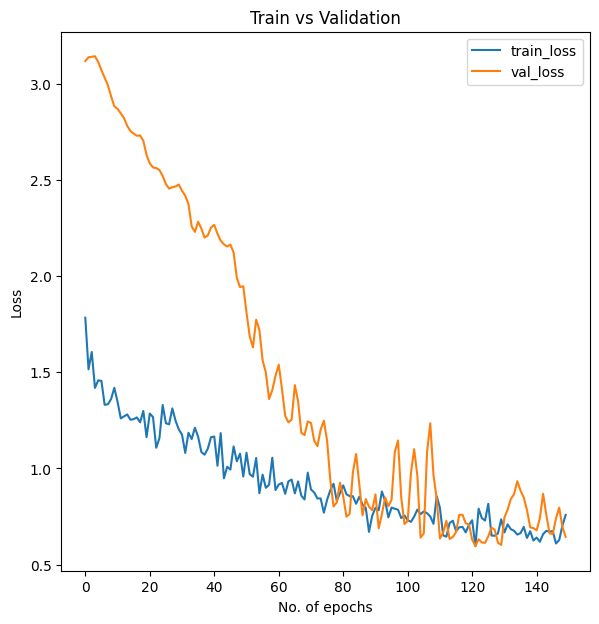

In [158]:
util.metrics_graph(cnnmodel, 150)

In [159]:
## Save the model
model.save(curr_dir + '/Models/Ramagiri/CNNModel_as_.keras')
print('Saved sample model to disk')

Saved sample model to disk


In [14]:
model = util.tf.keras.models.load_model(curr_dir + '/Models/Ramagiri/CNNModel_as_.keras')
# image_path = curr_dir + '/Images'
# plot_model(model, to_file=image_path + '/CNN_as.png', show_shapes=True, show_layer_names=True, rankdir='LR')

# img = plt.imread(image_path + '/CNN_as.png')
# plt.imshow(img)
# plt.axis('off')
# plt.show()

In [113]:
model.save(curr_dir + '/Models/Ramagiri/CNNModel_as_.h5')
print('Saved sample model to disk')

Saved sample model to disk


In [114]:
util.netron.start(curr_dir + '/Models/Ramagiri/CNNModel_as_.h5')

Serving 'D:\GitUpload\CMT-GSC-AI/Models/Ramagiri/CNNModel_as_.h5' at http://localhost:8080


('localhost', 8080)

In [168]:
pred_catg, bins, y_pred = util.predict(model, X_test, y_train, 5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [169]:
catg = list(set(pred_catg))
catg

['60-80%', '0-20%', '20-40%', '40-60%']

In [170]:
catg.append('80-100%')

In [171]:
def extract_lower_bound(range_str):
    # Extract the first number using regular expressions
    return int(util.re.findall(r'\d+', range_str)[0])

catg = sorted(catg, key=extract_lower_bound)

bins_range = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

ppm_conc_as_ = util.pd.DataFrame({
    'ppm' : bins_range,
    '% range' : catg
})
ppm_conc_as_

,ppm,% range
0,0.5-1.184,0-20%
1,1.184-1.5360000000000003,20-40%
2,1.5360000000000003-2.076,40-60%
3,2.076-5.5880000000000045,60-80%
4,5.5880000000000045-7.05625,80-100%


In [172]:
plot_vals = util.pd.DataFrame({
    'Identifier': y_test.index,
    'Actual': y_test,
    'Predicted': y_pred
})

plot_vals = plot_vals.sort_values(by='Identifier')

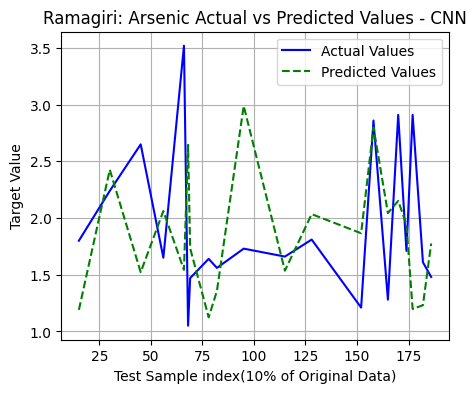

In [173]:
util.plt.figure(figsize=(5, 4))
util.plt.plot(plot_vals['Actual'], label='Actual Values', color='blue')
util.plt.plot(plot_vals['Predicted'], label='Predicted Values', color='green', linestyle='--')
util.plt.title('Ramagiri: Arsenic Actual vs Predicted Values - CNN')
util.plt.xlabel('Test Sample index(10% of Original Data)')
util.plt.ylabel('Target Value')
util.plt.legend()
util.plt.grid(True)
util.plt.show()

# CNN for Features from RFECV

In [174]:
features = util.pd.read_excel(data_path+'/Ramagiri dataset/Ramagiri_element_names.xlsx', sheet_name='Arsenic')

In [175]:
fs_elem_df = elem_df[features['Elements']]
fs_elem_df.head()

,al2o3,mno,ga,sr,cr,au,be,ge,ce,eu,yb,hf
0,14.606,1.52,11.3,375.7,49.9,1.5,0.902684,0.980504,72.232300,1.568522,2.290226,26.874492
1,13.750,1.52,10.1,465.2,50.1,1.5,1.189926,1.028039,63.086789,1.435208,2.891123,37.079419
2,13.410,2.89,12.6,487.6,56.4,1.5,1.565000,0.843000,48.971001,1.279000,2.323000,23.652000
3,14.010,2.12,13.5,405.8,59.8,1.5,1.536000,0.947000,56.014999,1.265000,2.322000,26.705000
4,14.940,2.31,14.1,370.9,55.7,1.5,1.334000,1.011000,45.799000,1.276000,2.311000,23.323999


# Normalize

In [176]:
fs_train_df = fs_elem_df.copy()

In [177]:
fs_train_df.shape

(200, 12)

In [178]:
rs = util.RobustScaler()
fs_norm_data = rs.fit_transform(fs_train_df)

In [179]:
n_samples = len(fs_train_df)
n_features = len(fs_train_df.columns)
fs_train_df = fs_norm_data.reshape((n_samples, n_features, 1))
fs_train_df.shape

(200, 12, 1)

In [180]:
X_train, X_test, y_train, y_test = util.train_test_split(fs_train_df, 
                                                         target, 
                                                         test_size=0.1, 
                                                         random_state=42,
                                                         shuffle=True)

In [181]:
X_train, X_val, y_train, y_val = util.train_test_split(X_train, 
                                                       y_train, 
                                                       test_size=0.1, 
                                                       random_state=42,
                                                       shuffle=True)

# Model Training

## CNN

In [515]:
def cnn_model(n_features, learning_rate):
    
    model = util.Sequential()

    model.add(util.Conv1D(32, kernel_size=3, padding='same', input_shape=(n_features, 1), activation='relu'))
    model.add(util.BatchNormalization())
    model.add(util.MaxPool1D())
    model.add(util.Dropout(0.5))

    model.add(util.Conv1D(64, kernel_size=3, padding='same', input_shape=(n_features, 1), activation='relu'))
    model.add(util.BatchNormalization())
    model.add(util.MaxPool1D())
    model.add(util.Dropout(0.4))

    model.add(util.Conv1D(128, kernel_size=3, padding='same', input_shape=(n_features, 1), activation='relu'))
    model.add(util.BatchNormalization())
    model.add(util.MaxPool1D())
    model.add(util.Dropout(0.3))

    # model.add(util.Conv1D(256, kernel_size=3, padding='same', input_shape=(n_features, 1), activation='relu'))
    # model.add(util.BatchNormalization())
    # model.add(util.MaxPool1D())
    model.add(util.Dropout(0.2))

    # model.add(util.Dropout(0.4))
    model.add(util.Dense(32, activation='relu'))
    # model.add(util.Dropout(0.3))
    model.add(util.Dense(64, activation='relu'))
    # model.add(util.Dropout(0.3))
    model.add(util.Dense(128, activation='relu'))
    # model.add(util.Dense(256, activation='relu'))
    # model.add(util.Dropout(0.3))
    model.add(util.Dense(1))

    opt = util.Adam(learning_rate)
    model.compile(optimizer=opt, loss='mae')

    return model

In [516]:
lr = 0.0005

lr_schdlr = util.ExponentialDecay(initial_learning_rate=lr, 
                                  decay_steps=100, 
                                  decay_rate=0.96, 
                                  staircase=True)

In [517]:
model = cnn_model(n_features, lr_schdlr)
model.summary()

Model: "sequential_97"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_338 (Conv1D)                  │ (None, 12, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_338              │ (None, 12, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_338 (MaxPooling1D)     │ (None, 6, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_463 (Dropout)                │ (None, 6, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_339 (Conv1D)                  │ (None, 6, 64)               │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_339              │ (None, 6, 64)               │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_339 (MaxPooling1D)     │ (None, 3, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_464 (Dropout)                │ (None, 3, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_340 (Conv1D)                  │ (None, 3, 128)              │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_340              │ (None, 3, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_340 (MaxPooling1D)     │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_465 (Dropout)                │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_466 (Dropout)                │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_404 (Dense)                    │ (None, 1, 32)               │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_405 (Dense)                    │ (None, 1, 64)               │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_406 (Dense)                    │ (None, 1, 128)              │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_407 (Dense)                    │ (None, 1, 1)                │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,625 (182.13 KB)

 Trainable params: 46,177 (180.38 KB)

 Non-trainable params: 448 (1.75 KB)

In [518]:
fs_cnnmodel = model.fit(X_train, y_train, 
                     epochs=100, batch_size=32, 
                     validation_data=(X_val, y_val))

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 1.9919 - val_loss: 3.0664
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.5156 - val_loss: 2.9914
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.5078 - val_loss: 2.9661
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.7149 - val_loss: 2.9382
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.5109 - val_loss: 2.9504
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.6244 - val_loss: 2.9606
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.5113 - val_loss: 2.9599
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.6103 - val_loss: 2.9400
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.4726 - val_loss: 2.8798
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.4143 - val_loss: 2.7886
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.4793 - val_loss: 2.7339
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.4128 - val_lo

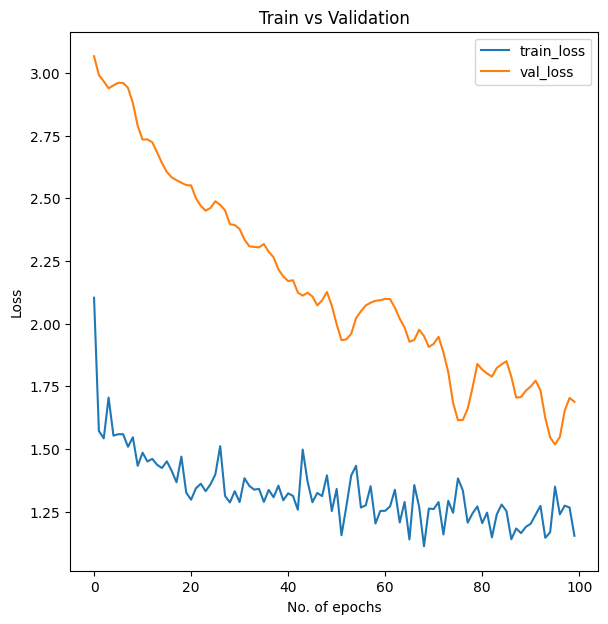

In [519]:
util.metrics_graph(fs_cnnmodel, 100)

In [ ]:
## Save the model
model.save(curr_dir + '/Models/Ramagiri/CNNModel_as_.keras')
print('Saved sample model to disk')